In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [88]:
import warnings
warnings.filterwarnings('ignore') 

In [90]:
#df=pd.read_csv("flights.csv")
df = pd.read_csv("flights.csv", low_memory=False)
print(df)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [92]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
columns_to_numeric = ['DEPARTURE_DELAY', 'AIR_TIME', 'DISTANCE', 
                      'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
                      'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [96]:
df.count()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON      89884
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
AIRLINE_DELAY          1063439
LATE_AIRCRAFT_DELAY    1063439
WEATHER_DELAY          1063439
dtype: int64

In [98]:
df1=df.head(500)
print(df1)

     YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0    2015      1    1            4      AS             98      N407AS   
1    2015      1    1            4      AA           2336      N3KUAA   
2    2015      1    1            4      US            840      N171US   
3    2015      1    1            4      AA            258      N3HYAA   
4    2015      1    1            4      AS            135      N527AS   
..    ...    ...  ...          ...     ...            ...         ...   
495  2015      1    1            4      MQ           3568      N528MQ   
496  2015      1    1            4      OO           5348      N562SW   
497  2015      1    1            4      OO           5256      N789SK   
498  2015      1    1            4      OO           4747      N810SK   
499  2015      1    1            4      OO           5464      N296SW   

    ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0              ANC                 SEA                 

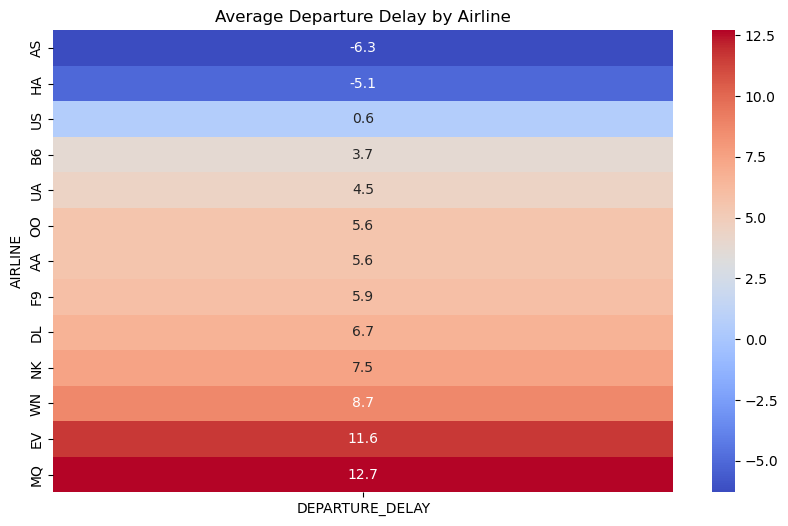

In [100]:
#heatmap
plt.figure(figsize=(10, 6))
avg_delays = df1.groupby("AIRLINE")["DEPARTURE_DELAY"].mean().sort_values()
sns.heatmap(avg_delays.to_frame(), annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Average Departure Delay by Airline")
plt.show()

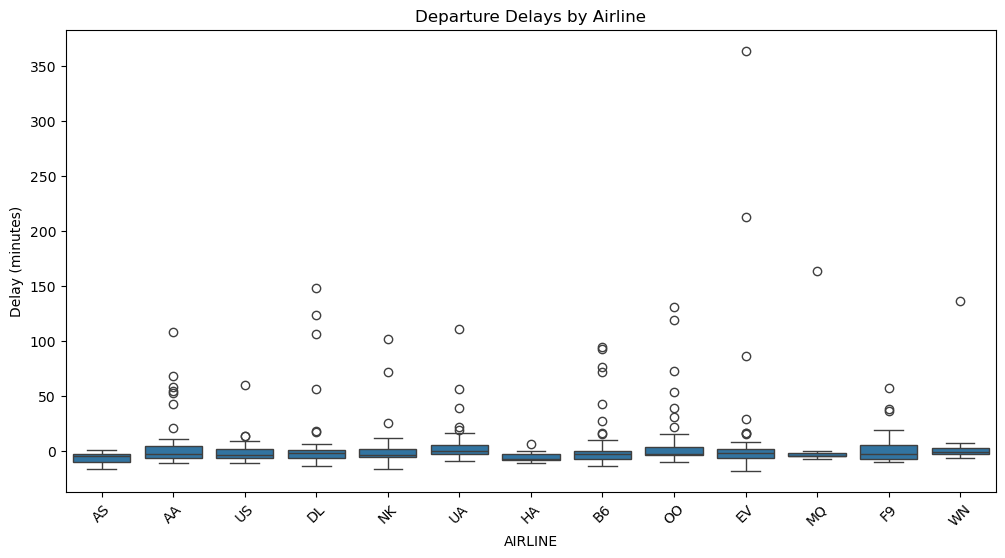

In [102]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x="AIRLINE", y="DEPARTURE_DELAY")
plt.title("Departure Delays by Airline")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

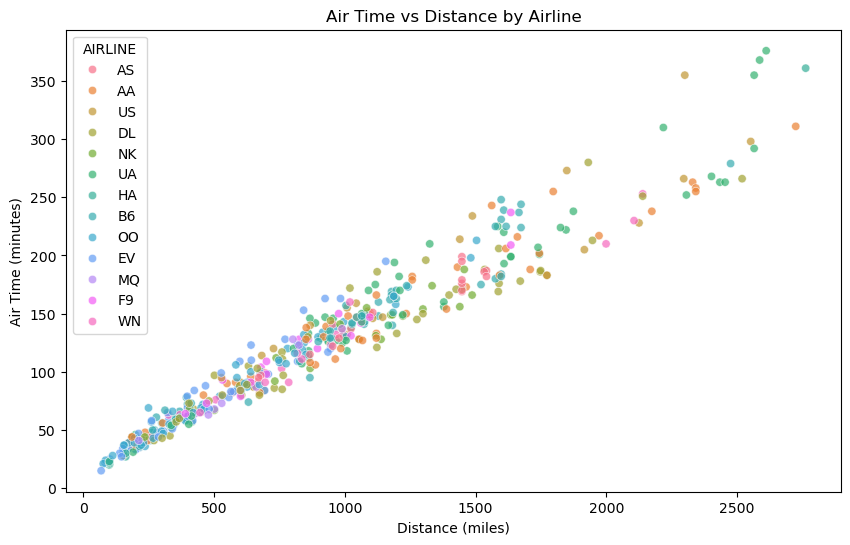

In [104]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="DISTANCE", y="AIR_TIME", hue="AIRLINE", alpha=0.7)
plt.title("Air Time vs Distance by Airline")
plt.xlabel("Distance (miles)")
plt.ylabel("Air Time (minutes)")
plt.show()

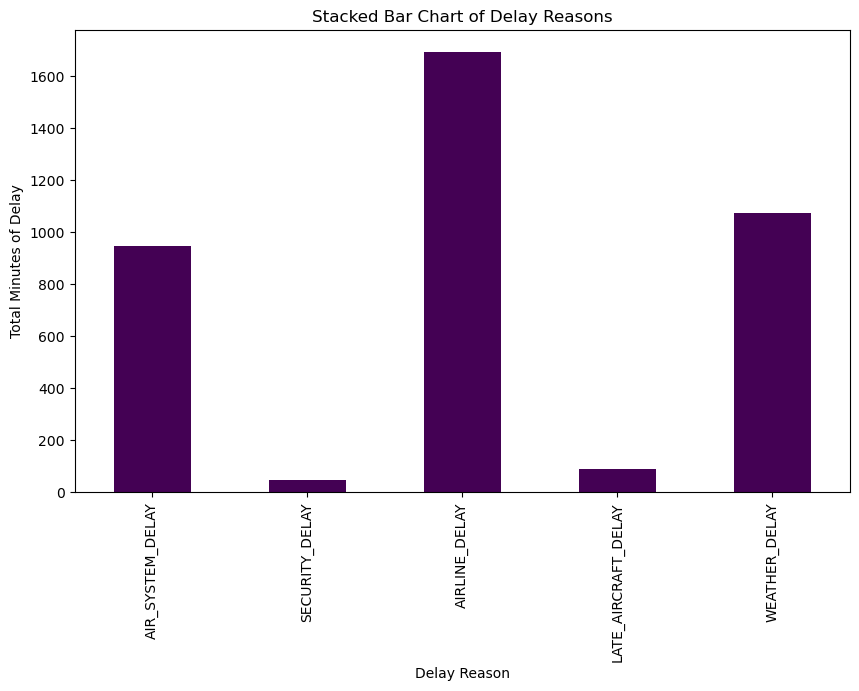

In [106]:
#stacked bar charts
delay_reasons = ["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
delay_totals = df1[delay_reasons].sum()
delay_totals.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Stacked Bar Chart of Delay Reasons")
plt.ylabel("Total Minutes of Delay")
plt.xlabel("Delay Reason")
plt.show()

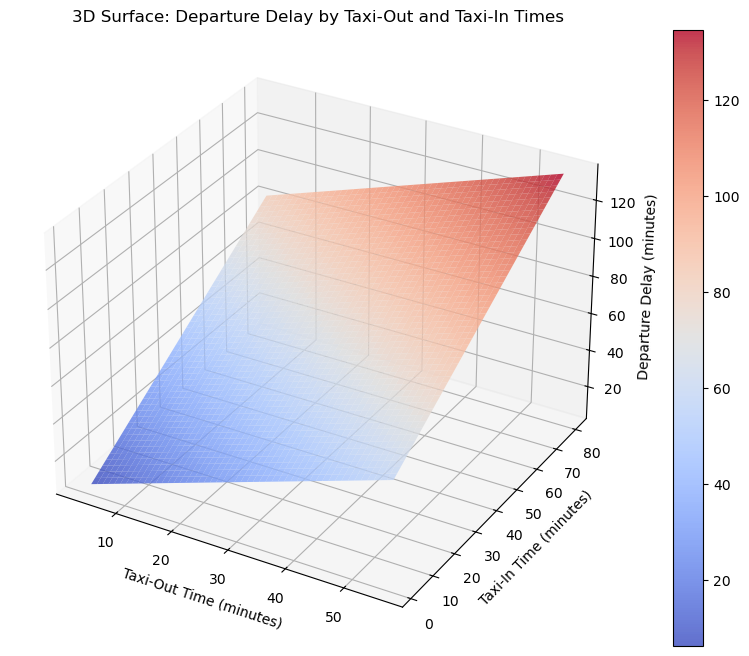

In [108]:
#surface plot
from matplotlib import cm
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(df1['TAXI_OUT'].min(), df1['TAXI_OUT'].max(), 50)
y = np.linspace(df1['TAXI_IN'].min(), df1['TAXI_IN'].max(), 50)
x, y = np.meshgrid(x, y)
z = x + y 

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, alpha=0.8)
ax.set_title("3D Surface: Departure Delay by Taxi-Out and Taxi-In Times")
ax.set_xlabel("Taxi-Out Time (minutes)")
ax.set_ylabel("Taxi-In Time (minutes)")
ax.set_zlabel("Departure Delay (minutes)")

plt.colorbar(surf)
plt.show()

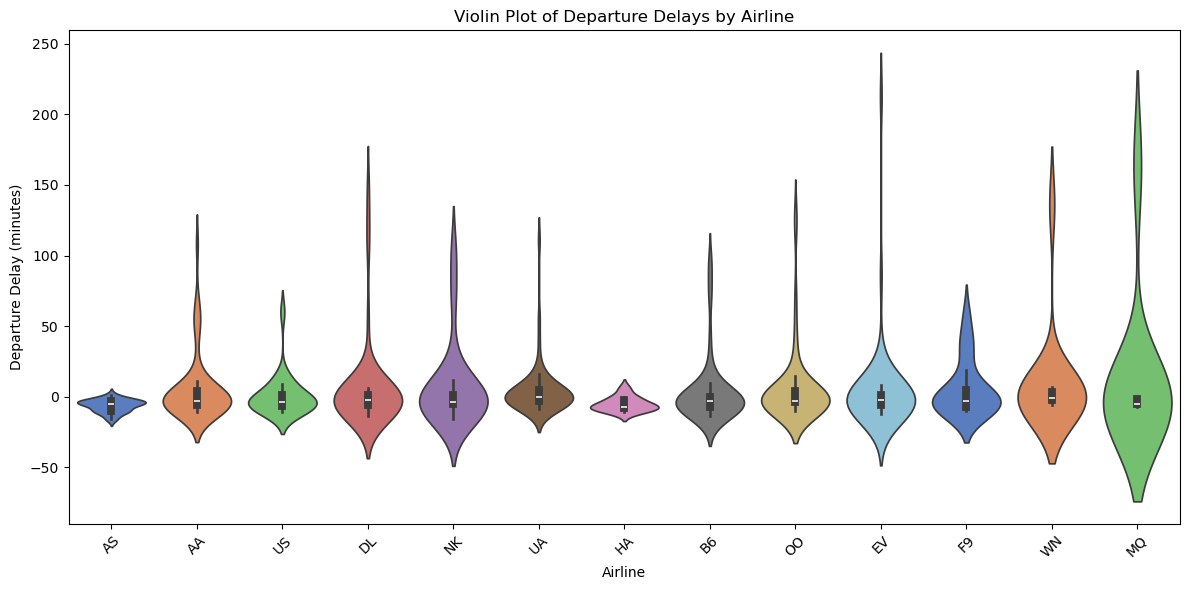

In [110]:
#violin plot
df1.loc[:, 'DEPARTURE_DELAY'] = pd.to_numeric(df1['DEPARTURE_DELAY'], errors='coerce')

df1_filtered = df1[df1['DEPARTURE_DELAY'].between(-50, 300)].copy() 

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df1_filtered, 
    x='AIRLINE', 
    y='DEPARTURE_DELAY', 
    palette="muted", 
    density_norm='width' 
)
plt.title("Violin Plot of Departure Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

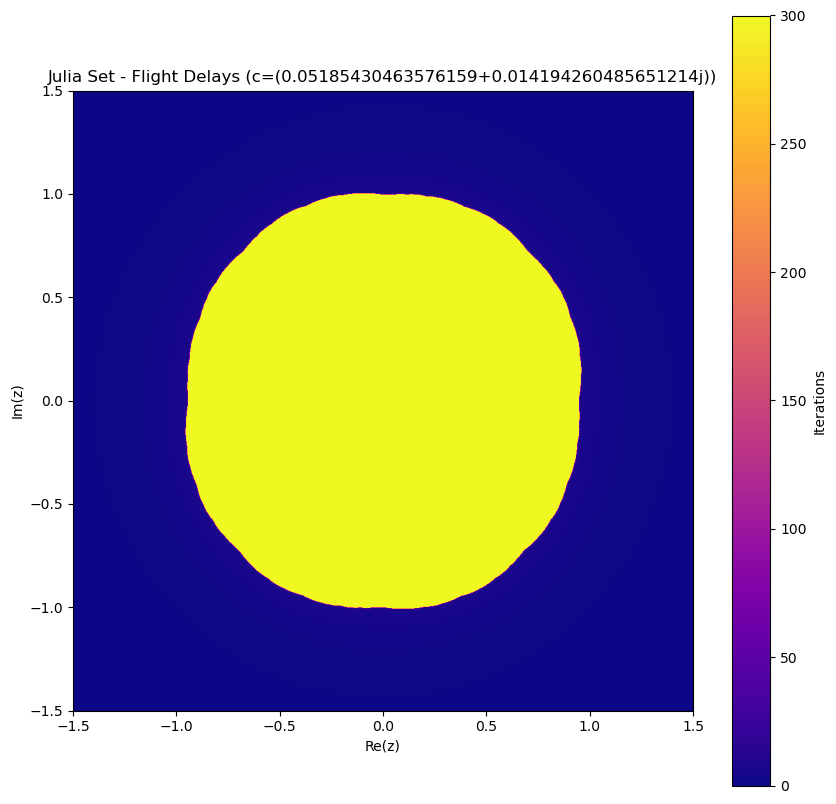

In [66]:
# Convert delays to numeric with .loc[] to avoid SettingWithCopyWarning
df1.loc[:, 'DEPARTURE_DELAY'] = pd.to_numeric(df1['DEPARTURE_DELAY'], errors='coerce')
df1.loc[:, 'ARRIVAL_DELAY'] = pd.to_numeric(df1['ARRIVAL_DELAY'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df1 = df1.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'])
departure_delay = df1['DEPARTURE_DELAY'].mean() / 100  # Normalize
arrival_delay = df1['ARRIVAL_DELAY'].mean() / 100      # Normalize
c = complex(departure_delay, arrival_delay)

# Julia Set function
def julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    julia_image = np.empty((width, height))
    for i, re in enumerate(x):
        for j, im in enumerate(y):
            z = complex(re, im)
            n = 0
            while abs(z) <= 2 and n < max_iter:
                z = z**2 + c
                n += 1
            julia_image[i, j] = n
    return julia_image

# Visualization parameters
xmin, xmax, ymin, ymax = -1.5, 1.5, -1.5, 1.5
width, height = 1000, 1000
max_iter = 300

julia_image = julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter)

# Plot the Julia Set
plt.figure(figsize=(10, 10))
plt.imshow(julia_image.T, extent=[xmin, xmax, ymin, ymax], cmap='plasma')
plt.colorbar(label='Iterations')
plt.title(f"Julia Set - Flight Delays (c={c})")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

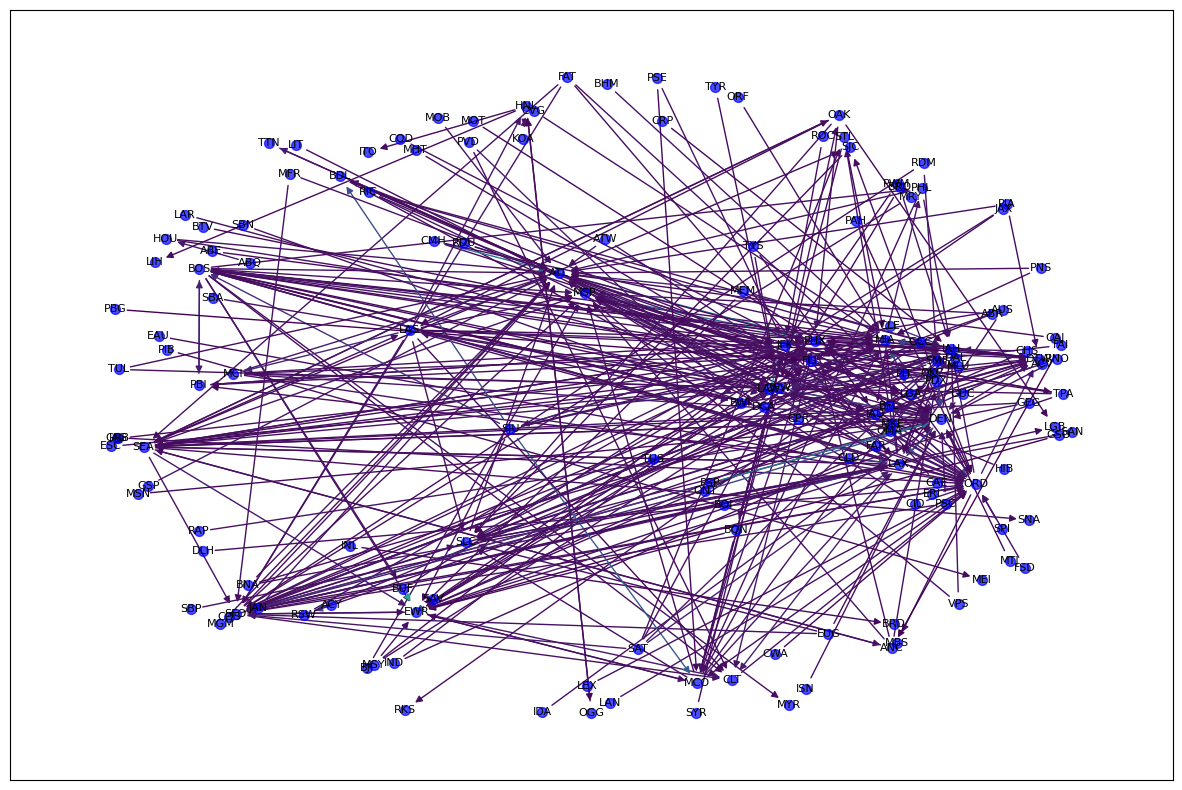

In [112]:
df1['DEPARTURE_DELAY'] = pd.to_numeric(df1['DEPARTURE_DELAY'], errors='coerce')
df1['ARRIVAL_DELAY'] = pd.to_numeric(df1['ARRIVAL_DELAY'], errors='coerce')
df1 = df1.dropna(subset=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY'])

flight_routes = df1.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['DEPARTURE_DELAY'].mean().reset_index()
flight_routes.rename(columns={'DEPARTURE_DELAY': 'AVG_DELAY'}, inplace=True)

G = nx.DiGraph()

for _, row in flight_routes.iterrows():
    origin = row['ORIGIN_AIRPORT']
    destination = row['DESTINATION_AIRPORT']
    avg_delay = row['AVG_DELAY']
    G.add_edge(origin, destination, weight=avg_delay)

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.3, seed=42) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)

edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.viridis, width=1.0)

nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm.set_array([])
plt.colorbar(sm, label='Average Departure Delay (minutes)')

plt.title("Flight Routes Network with Average Departure Delay")
plt.axis('off')
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
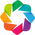

Loading BokehJS ...

In [116]:
import holoviews as hv
from bokeh.io import output_notebook, show
hv.extension('bokeh')
output_notebook()

# Convert delays to numeric and handle missing values
df1['DEPARTURE_DELAY'] = pd.to_numeric(df1['DEPARTURE_DELAY'], errors='coerce')
df1['ARRIVAL_DELAY'] = pd.to_numeric(df1['ARRIVAL_DELAY'], errors='coerce')
df1 = df1.dropna(subset=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY'])

# Group data by flight routes and calculate total number of flights and average delay
flight_routes = df1.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).agg(
    total_flights=('DEPARTURE_DELAY', 'count'),
    avg_delay=('DEPARTURE_DELAY', 'mean')
).reset_index()

# Create the data for the chord diagram
nodes = list(set(flight_routes['ORIGIN_AIRPORT']).union(set(flight_routes['DESTINATION_AIRPORT'])))
nodes_index = {node: i for i, node in enumerate(nodes)}
links = [
    {
        'source': nodes_index[row['ORIGIN_AIRPORT']],
        'target': nodes_index[row['DESTINATION_AIRPORT']],
        'value': row['total_flights'],
        'weight': row['avg_delay']
    }
    for _, row in flight_routes.iterrows()
]

chord_links = [(link['source'], link['target'], link['value']) for link in links]
chord_nodes = [(index, node) for node, index in nodes_index.items()]

chord = hv.Chord((chord_links, hv.Dataset(chord_nodes, 'index', 'label'))).opts(
    labels='label',
    cmap='Viridis',
    edge_cmap='Viridis',
    edge_color='value',
    node_color='index',
    edge_line_width=2,
    width=1000,  
    height=800,   
    title="Flight Routes Chord Diagram"
)

show(hv.render(chord))
